# Part II - Ford GoBike System Data Analysis 
## by Sandra Kamikazi

## Investigation Overview


#### Key Insights for Presentation

My presentation was focused on the organized steps I took to gather the data for my dataset. First, I introduced my dataset and its importance by exhibiting and describing it. Then I started with various cleaning-related tasks, incorporating elements that helped my analysis, such as the days of the week, into the process. Then I started presenting the findings of my research.

I employed various strategies in my research to address particular questions I had for myself, such as what proportions of men and women rent bikes? In order to react to these questions, I used visualizations like donut charts and histograms.


#### Summary of Findings

While subscribers often use them to commute to work or school, I learned from my research that customers are more likely to be tourists, vacationers, or infrequent users. Second, the regular hours were changed to 7 am and 7 pm due to subscribers' much higher user base. It would be amazing to observe the variations if research on use length were done. Thirdly, customer excursions on bikes typically last longer than ones taken by subscribers. Fourth, around 90.5% of the journeys were made by subscribers. Not to mention, more than 75% of users are men.

## Dataset Overview

Data collected for the bike-sharing service in the greater San Francisco Bay area includes information on each ride. The Bay Area Bike Share model of the Ford GoBike was first made available in the San Francisco Bay Area in 2013. It was later resurrected as the Ford GoBike. In addition, the system has been known as Bay Wheels since June 2019. The three Bay Wheels pricing tiers are contained in the dataset, so you must be aware of them. Additionally, there are two payment options: paying per trip as a non-user or paying on a monthly or annual subscription basis for Bike Share for All.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Percentage of users who are male and female

*The gender split is 76.2% men to 23.8% women.*

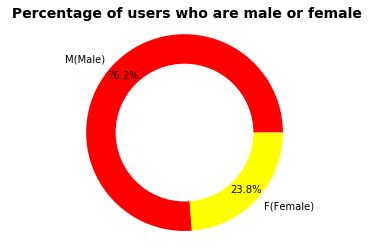

In [3]:
#Donut chart for gender
M = df.query("member_gender == 'Male'")["member_gender"].count()
F = df.query("member_gender == 'Female'")["member_gender"].count()
gender = [M, F]
labels = 'M(Male)', 'F(Female)'
colors = ['#FF0000', '#FFFF00']
plt.pie(gender, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('square');
plt.title(" Percentage of users who are male or female", fontsize=14, weight='bold')
plt.show()


## The number of bike rides rented on the various days of the week 

- It is interesting how many bicycles are rented on Friday, and I think it is because people may go for a walk with their bike to relax after work. And also on the weeks. It is also interesting that people rent bicycles on Mondays and Tuesdays. Maybe relax for five days and work for two days, lol. People don't rent much on Wednesday and Thursday, and I presume many people are working here. 

- It will be interesting to check which are the most popular hours to rent a bike

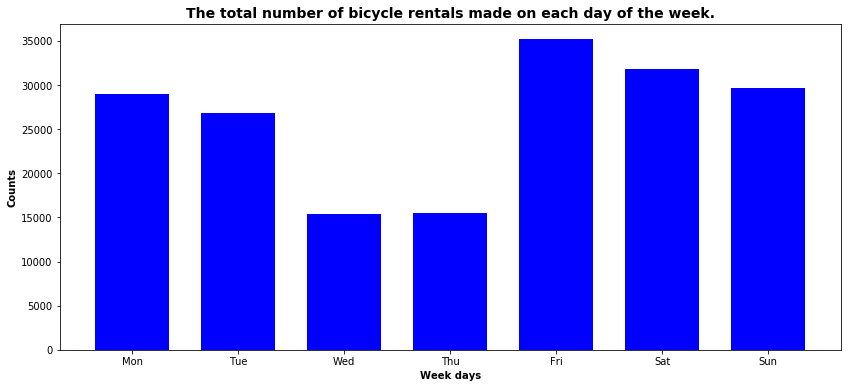

In [6]:
#change datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Produce and start day and an end day column for the start time and end time columns
df['start_day'] = df['start_time'].dt.day_name()
df['end_day'] = df['end_time'].dt.day_name()

#Producing a bar chart for start day 
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[14,6])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df, x = 'start_day', bins = bin_edges, rwidth = 0.7, color = "blue")
plt.xticks(np.arange(0, 6+1, 1), days)
plt.title('The total number of bicycle rentals made on each day of the week.', fontsize=14, weight='bold')
plt.xlabel('Week days', fontsize=10, weight='bold')
plt.ylabel('Counts', fontsize=10, weight='bold');

## What connection exists between different user categories and the workweek?

Assessing the days of the week that bike service users and subscribers use the service the most. Interestingly, subscribers are most active on Monday, Tuesday, and Wednesday, whereas customers are most active on Monday and Sunday.

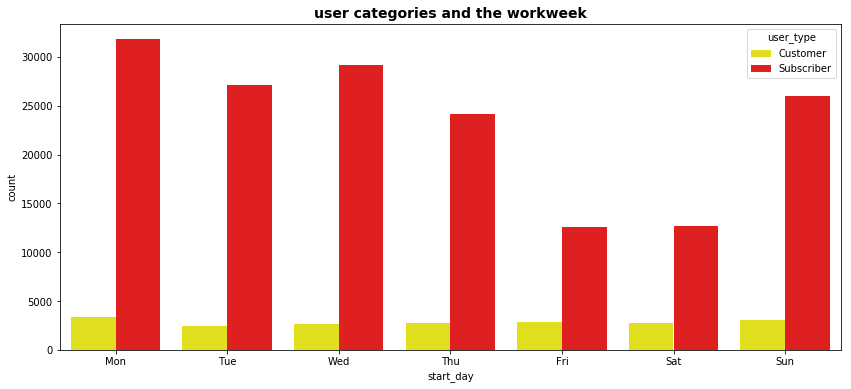

In [7]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = [14,6])
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette=['#FFFF00', '#FF0000'])
plt.title('user categories and the workweek' , fontsize=14, weight='bold')
plt.xticks(np.arange(0, 6+1, 1), days)
plt.show()

## Average journey length for various users on different days of the week

For both user types, Friday and Saturday are the busiest days. Sunday has the third-highest number of subscribers, while Thursday has the third-highest number of customers.

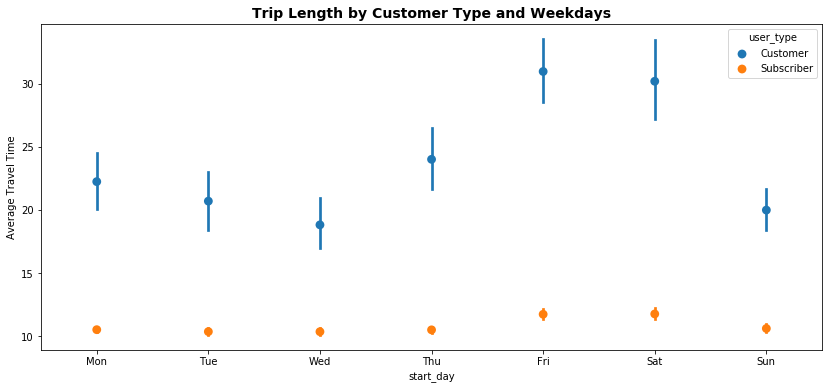

In [8]:
df['duration_min'] =df['duration_sec']/60
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = df, x ='start_day', y = 'duration_min', hue = 'user_type', linestyles = '')
plt.title('Trip Length by Customer Type and Weekdays', fontsize=14, weight='bold')
plt.ylabel('Average Travel Time')
plt.xticks(np.arange(0, 6+1, 1), days)
ax.set_yticklabels([],minor = True)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert --to slides --no-input Part_II_Ford_GoBike_System.ipynb

[NbConvertApp] Converting notebook Part_II_Ford_GoBike_System.ipynb to slides
[NbConvertApp] Writing 361422 bytes to Part_II_Ford_GoBike_System.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
